In [1]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
from matplotlib.animation import FuncAnimation,FFMpegFileWriter

In [2]:
def XVelocity( x, y, sigma = 10.0 ):
    return sigma * ( y - x )
def YVelocity( x, y, z, row = 28.0 ):
    return ( -x * z ) + ( row * x ) - y
def ZVelocity( x, y, z, beta = 8.0 / 3.0 ):
    return ( x * y ) - ( beta * z )


In [96]:
def LorenzButterfly( step = .1, steps = 1000, xInitial = 0.0, yInitial = 0.0, zInitial = 0.0, sigma = 10.0, row = 28.0, beta = 8.0 / 3.0 ):
    cells = steps#step * steps )
    x = np.zeros( cells + 1 )
    y = np.zeros( cells + 1 )
    z = np.zeros( cells + 1 )
    time = np.zeros( cells + 1 )
    x[ 0 ] = xInitial
    y[ 0 ] = yInitial
    z[ 0 ] = zInitial
    for i in range( cells ):
        k1X = step * XVelocity( x[ i ], y[ i ], sigma )
        k1Y = step * YVelocity( x[ i ], y[ i ], z[ i ], row )
        k1Z = step * ZVelocity( x[ i ], y[ i ], z[ i ], beta )
        ######################################################
        k2X = step * XVelocity( x[ i ] + k1X / 2.0, y[ i ] + k1Y / 2.0, sigma )
        k2Y = step * YVelocity( x[ i ] + k1X / 2.0, y[ i ] + k1Y / 2.0, z[ i ] + k1Z / 2.0, row )
        k2Z = step * ZVelocity( x[ i ] + k1X / 2.0, y[ i ] + k1Y / 2.0, z[ i ] + k1Z / 2.0, beta )
        #######################################################
        k3X = step * XVelocity( x[ i ] + k2X / 2.0, y[ i ] + k2Y / 2.0, sigma )
        k3Y = step * YVelocity( x[ i ] + k2X / 2.0, y[ i ] + k2Y / 2.0, z[ i ] + k2Z / 2.0, row )
        k3Z = step * ZVelocity( x[ i ] + k2X / 2.0, y[ i ] + k2Y / 2.0, z[ i ] + k2Z / 2.0, beta )
        #######################################################
        k4X = step * XVelocity( x[ i ] + k3X, ( y[ i ] + k3X ), sigma )
        k4Y = step * YVelocity( x[ i ] + k3X, ( y[ i ] + k3Y ), ( z[ i ] + k3Z ), row )
        k4Z = step * ZVelocity( x[ i ] + k3X, ( y[ i ] + k3Y ), ( z[ i ] + k3Z ), beta )
        #######################################################
        x[ i + 1 ] = x[ i ] + ( ( 1.0 / 6.0 ) * ( k1X + ( 2.0 * ( k2X + k3X ) ) + k4X ) )
        y[ i + 1 ] = y[ i ] + ( ( 1.0 / 6.0 ) * ( k1Y + ( 2.0 * ( k2Y + k3Y ) ) + k4Y ) )
        z[ i + 1 ] = z[ i ] + ( ( 1.0 / 6.0 ) * ( k1Z + ( 2.0 * ( k2Z + k3Z ) ) + k4Z ) )
        time[ i + 1 ] + step
    return x, y, z, time


In [97]:
data = LorenzButterfly( .01, 5000, 1.0, 2.2, 3.0 )

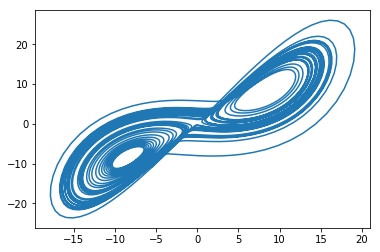

In [98]:
plt.plot( data[ 0 ], data[ 1 ] )

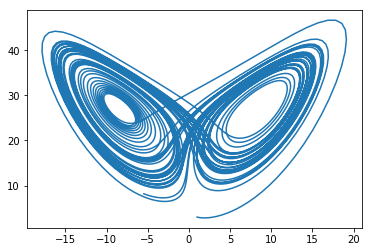

In [101]:
plt.plot( data[ 0 ], data[ 2 ] )

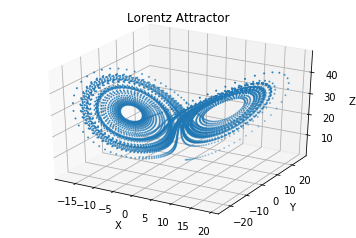

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = fig.gca(projection='3d')
ax.scatter(data[ 0 ], data[ 1 ], data[ 2 ], s=1)
plt.title('Lorentz Attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()